In [1]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import linregress

from armored.models import *
from armored.preprocessing import *

import time

np.random.seed(12345)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Define variable names

In [2]:
# define system variables
species = ["s"+str(i+1) for i in range(5)]
ns = len(species)
controls = ["dt"]
metabolites = []
system_variables = np.concatenate((species, metabolites))
system_variables

array(['s1', 's2', 's3', 's4', 's5'], dtype='<U32')

## Import sum-of-OD data and community data

In [3]:
#sum_data = pd.read_csv("gLV_data/Simulated_gLV_data_sum.csv").rename(columns={"Treatments":"Experiments"})
#full_data = pd.read_csv("gLV_data/Simulated_gLV_data_full.csv").rename(columns={"Treatments":"Experiments"})
sum_data = pd.read_csv("CR_data/CR_data_sum.csv")
sum_data

,Experiments,Time,OD,s1,s2,s3,s4,s5
0,Exp_0,0.0,0.200000,0.000000,0.000000,0.000000,0.100000,0.100000
1,Exp_0,20.0,0.463590,0.000000,0.000000,0.000000,0.268503,0.195087
2,Exp_0,40.0,0.406714,0.000000,0.000000,0.000000,0.243607,0.163107
3,Exp_0,60.0,0.333278,0.000000,0.000000,0.000000,0.199142,0.134135
4,Exp_0,80.0,0.275383,0.000000,0.000000,0.000000,0.164233,0.111150
...,...,...,...,...,...,...,...,...
805,Exp_89,80.0,1.571290,0.098141,0.045170,0.016721,1.162930,0.248328
806,Exp_89,100.0,1.588626,0.080053,0.034787,0.014483,1.216704,0.242599
807,Exp_89,120.0,1.554661,0.067091,0.029417,0.013488,1.215250,0.229416
808,Exp_89,140.0,1.481062,0.053449,0.024978,0.013340,1.174889,0.214407


In [4]:
# add time step as control variable 
dt_max = np.max(np.diff(sum_data.Time.values))
sum_data_dt = []
for name, df in sum_data.groupby("Experiments"):
    df_dt = df.copy()
    df_dt["dt"] = np.diff(df.Time.values, append=2*df.Time.values[-1]-df.Time.values[-2]) / dt_max
    sum_data_dt.append(df_dt)
sum_data_dt = pd.concat(sum_data_dt)

# Define compression functions

In [5]:
# define compression functions 
C1 = np.eye(ns)
C = [C1]

In [6]:
# format data frames
X, U, Y, _ = format_data(sum_data_dt, species, metabolites, controls, observed=species)

In [7]:
# normalize data ?
# Y_max = np.max(Y, 0)
# Yf_max = np.max(Yf, 0)

In [8]:
data = [(X, U, Y)]

## Init MiRNN

In [9]:
# init model
brnn = miRNN(n_species=len(species), n_metabolites=len(metabolites), n_controls=len(controls),
             n_hidden=16, alpha_0=1., param_0=1.)

# fit model
brnn.fit(data, C=C, map_tol=.001, evd_tol=.001, lr=.01)

Epoch: 0, Loss: 1225.36371, Residuals: 0.27511, Convergence:   inf
Epoch: 1, Loss: 1207.39441, Residuals: 0.27192, Convergence: 0.014883
Epoch: 2, Loss: 1189.39075, Residuals: 0.26897, Convergence: 0.015137
Epoch: 3, Loss: 1171.61597, Residuals: 0.26615, Convergence: 0.015171
Epoch: 4, Loss: 1154.19263, Residuals: 0.26337, Convergence: 0.015096
Epoch: 5, Loss: 1137.13452, Residuals: 0.26053, Convergence: 0.015001
Epoch: 6, Loss: 1120.41357, Residuals: 0.25756, Convergence: 0.014924
Epoch: 7, Loss: 1103.98926, Residuals: 0.25444, Convergence: 0.014877
Epoch: 8, Loss: 1087.83069, Residuals: 0.25115, Convergence: 0.014854
Epoch: 9, Loss: 1071.91370, Residuals: 0.24772, Convergence: 0.014849
Epoch: 10, Loss: 1056.21838, Residuals: 0.24419, Convergence: 0.014860
Epoch: 11, Loss: 1040.73132, Residuals: 0.24062, Convergence: 0.014881
Epoch: 12, Loss: 1025.43726, Residuals: 0.23706, Convergence: 0.014915
Epoch: 13, Loss: 1010.32611, Residuals: 0.23357, Convergence: 0.014957
Epoch: 14, Loss: 99

Epoch: 118, Loss: 185.95175, Residuals: 0.06325, Convergence: 0.015619
Epoch: 119, Loss: 183.10478, Residuals: 0.06255, Convergence: 0.015548
Epoch: 120, Loss: 180.30634, Residuals: 0.06185, Convergence: 0.015521
Epoch: 121, Loss: 177.56924, Residuals: 0.06114, Convergence: 0.015414
Epoch: 122, Loss: 174.87831, Residuals: 0.06045, Convergence: 0.015387
Epoch: 123, Loss: 172.24449, Residuals: 0.05975, Convergence: 0.015291
Epoch: 124, Loss: 169.66002, Residuals: 0.05906, Convergence: 0.015233
Epoch: 125, Loss: 167.12064, Residuals: 0.05836, Convergence: 0.015195
Epoch: 126, Loss: 164.62798, Residuals: 0.05768, Convergence: 0.015141
Epoch: 127, Loss: 162.18616, Residuals: 0.05700, Convergence: 0.015056
Epoch: 128, Loss: 159.78868, Residuals: 0.05632, Convergence: 0.015004
Epoch: 129, Loss: 157.43547, Residuals: 0.05564, Convergence: 0.014947
Epoch: 130, Loss: 155.12665, Residuals: 0.05498, Convergence: 0.014883
Epoch: 131, Loss: 152.86020, Residuals: 0.05431, Convergence: 0.014827
Epoch:

Epoch: 235, Loss: 47.10856, Residuals: 0.01926, Convergence: 0.007386
Epoch: 236, Loss: 46.76622, Residuals: 0.01912, Convergence: 0.007320
Epoch: 237, Loss: 46.43111, Residuals: 0.01898, Convergence: 0.007217
Epoch: 238, Loss: 46.08836, Residuals: 0.01866, Convergence: 0.007437
Epoch: 239, Loss: 45.76546, Residuals: 0.01852, Convergence: 0.007056
Epoch: 240, Loss: 45.44822, Residuals: 0.01838, Convergence: 0.006980
Epoch: 241, Loss: 45.13575, Residuals: 0.01825, Convergence: 0.006923
Epoch: 242, Loss: 44.82829, Residuals: 0.01812, Convergence: 0.006859
Epoch: 243, Loss: 44.52768, Residuals: 0.01799, Convergence: 0.006751
Epoch: 244, Loss: 44.23139, Residuals: 0.01786, Convergence: 0.006699
Epoch: 245, Loss: 43.94175, Residuals: 0.01772, Convergence: 0.006592
Epoch: 246, Loss: 43.65561, Residuals: 0.01759, Convergence: 0.006554
Epoch: 247, Loss: 43.37556, Residuals: 0.01746, Convergence: 0.006456
Epoch: 248, Loss: 43.09984, Residuals: 0.01733, Convergence: 0.006397
Epoch: 249, Loss: 42


Epoch: 336, Evidence: 7125.97314, Convergence: 0.002318
Epoch: 336, Loss: 1536.29663, Residuals: 0.00782, Convergence:   inf
Epoch: 337, Loss: 1536.19141, Residuals: 0.00782, Convergence: 0.000068

Epoch: 337, Evidence: 7137.26758, Convergence: 0.001582
Epoch: 337, Loss: 1540.01074, Residuals: 0.00782, Convergence:   inf
Epoch: 338, Loss: 1539.90027, Residuals: 0.00782, Convergence: 0.000072

Epoch: 338, Evidence: 7144.89746, Convergence: 0.001068
Epoch: 338, Loss: 1549.19653, Residuals: 0.00782, Convergence:   inf
Epoch: 339, Loss: 1549.08777, Residuals: 0.00782, Convergence: 0.000070

Epoch: 339, Evidence: 7151.21094, Convergence: 0.000883
Epoch: 339, Loss: 1551.89954, Residuals: 0.00782, Convergence:   inf
Epoch: 340, Loss: 1551.69580, Residuals: 0.00781, Convergence: 0.000131

Epoch: 340, Evidence: 7155.47021, Convergence: 0.001478
Epoch: 340, Loss: 1557.19019, Residuals: 0.00781, Convergence:   inf
Epoch: 341, Loss: 1556.97290, Residuals: 0.00781, Convergence: 0.000140

Epoch: 34

Epoch: 414, Loss: 1567.99316, Residuals: 0.02713, Convergence: 0.000991

Epoch: 414, Evidence: 7362.14844, Convergence: 0.000810
Epoch: 414, Loss: 1568.36377, Residuals: 0.02713, Convergence:   inf
Epoch: 415, Loss: 1565.04028, Residuals: 0.02695, Convergence: 0.002124
Epoch: 416, Loss: 1558.32666, Residuals: 0.02533, Convergence: 0.004308
Epoch: 417, Loss: 1555.17834, Residuals: 0.02524, Convergence: 0.002024
Epoch: 418, Loss: 1552.23303, Residuals: 0.02519, Convergence: 0.001897
Epoch: 419, Loss: 1549.04480, Residuals: 0.02509, Convergence: 0.002058
Epoch: 420, Loss: 1545.89807, Residuals: 0.02499, Convergence: 0.002036
Epoch: 421, Loss: 1542.67139, Residuals: 0.02489, Convergence: 0.002092
Epoch: 422, Loss: 404113.21875, Residuals: 0.40694, Convergence: -0.996183
Epoch: 422, Loss: 568828.37500, Residuals: 2.56733, Convergence: -0.997288
Epoch: 422, Loss: 86983.83594, Residuals: 0.74229, Convergence: -0.982265
Epoch: 422, Loss: 6627.54053, Residuals: 0.17019, Convergence: -0.767233
E

In [19]:
X.shape

(90, 5)

In [10]:
np.sqrt(1/brnn.beta)

0.051594943

In [11]:
# predict
preds, stdvs, COV = brnn.predict(X, U)

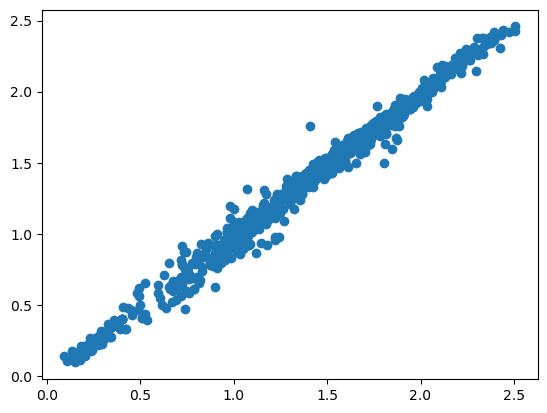

In [12]:
plt.scatter(np.sum(preds, -1), np.sum(Y, -1))

In [13]:
# predict
preds, stdvs, COV = brnn.predict(X, U)

[0.06731472 0.0657288  0.03102968 0.05708814 0.05472396]


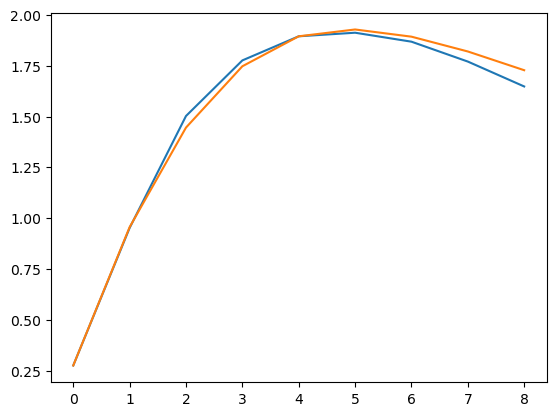

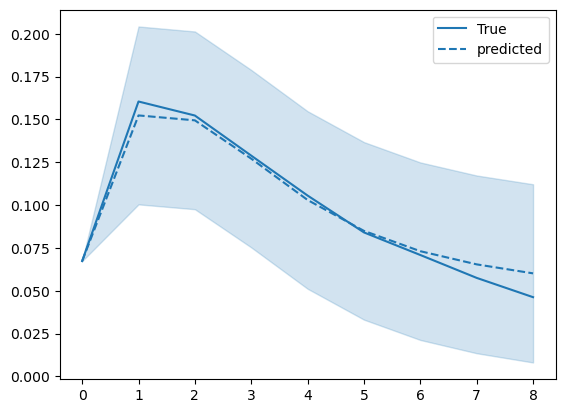

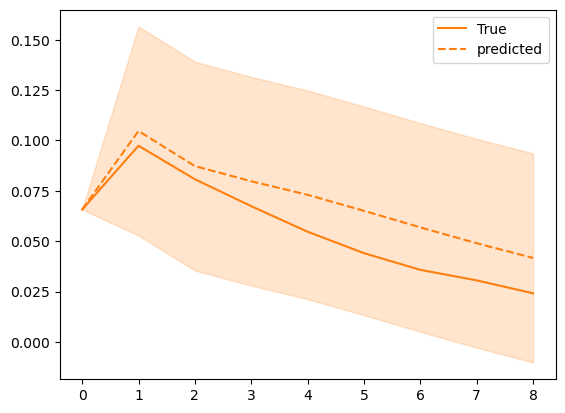

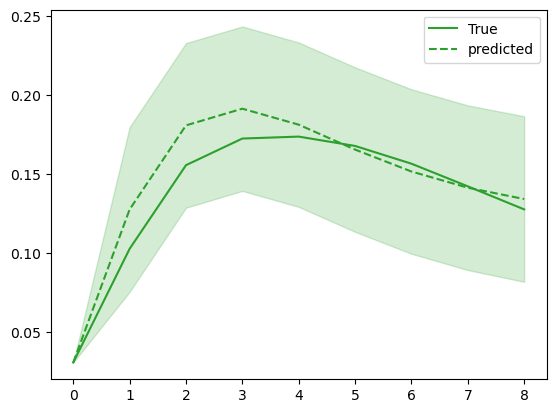

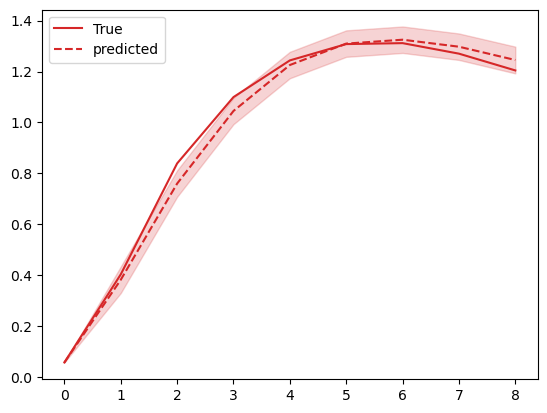

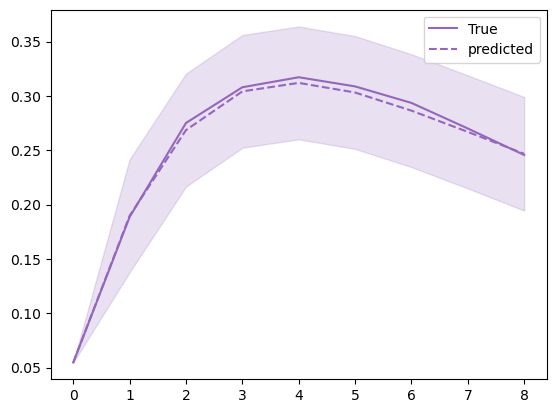

In [24]:
sample = 35
print(X[sample])

plt.plot(np.sum(Y[sample], -1))
plt.plot(np.sum(preds[sample], -1))
plt.show()

for i in range(ns):
    plt.plot(Y[sample,:,i], c=f"C{i}", label="True")
    plt.plot(preds[sample,:,i], c=f"C{i}", linestyle="--", label="predicted")
    plt.fill_between(np.arange(preds[sample].shape[0]), 
                     preds[sample,:,i] - stdvs[sample,:,i],
                     preds[sample,:,i] + stdvs[sample,:,i], 
                     color=f"C{i}", alpha=.2)
    plt.legend()
    plt.show()